In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation
%matplotlib inline

In [2]:
class spring:
    length = 20.0
    factor = 1.
    local_x = np.zeros([])
    local_y = np.zeros([])
    global_x = np.zeros(11)
    global_y = np.zeros(11)
    r0x = 0.0
    r0y = 0.0
    th = 0.0
    def __init__(self, L):
        self.length = L
        
        th0 = 60.*np.pi/180.
        x0 = 0.0
        y0 = 0.0
        x1 = x0 + 1.*np.cos(0.)
        y1 = y0 + 1.*np.sin(0.)
        x2 = x1 + 1.*np.cos(th0)
        y2 = y1 + 1.*np.sin(th0)
        x3 = x2 + 2.*np.cos(-th0)
        y3 = y2 + 2.*np.sin(-th0)
        x4 = x3 + 2.*np.cos(th0)
        y4 = y3 + 2.*np.sin(th0)
        x5 = x4 + 2.*np.cos(-th0)
        y5 = y4 + 2.*np.sin(-th0)
        x6 = x5 + 2.*np.cos(th0)
        y6 = y5 + 2.*np.sin(th0)
        x7 = x6 + 2.*np.cos(-th0)
        y7 = y6 + 2.*np.sin(-th0)
        x8 = x7 + 2.*np.cos(th0)
        y8 = y7 + 2.*np.sin(th0)
        x9 = x8 + 1.*np.cos(-th0)
        y9 = y8 + 1.*np.sin(-th0)
        x10 = x9 + 1.*np.cos(0.)
        y10 = y9 + 1.*np.sin(0.)
        
        self.factor = self.length/x10
        
        self.local_x = np.array([x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10])*self.factor
        self.local_y = np.array([y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10])
        
    def locate_spring(self, r0x,r0y,th):
        self.r0x = r0x
        self.r0y = r0y
        self.th = th
        #first rotate
        A = np.array([[np.cos(self.th),-np.sin(self.th)],
         [np.sin(self.th),np.cos(self.th)]])
        for k in range(0,11):
            x = A.dot(np.array([[self.local_x[k]],[self.local_y[k]]]))
            self.global_x[k] = x[0]
            self.global_y[k] = x[1]
        #now move
        self.global_x = self.r0x + self.global_x 
        self.global_y = self.r0y + self.global_y
        
    def change_length(self, new_length):
        self.length = new_length
        
    def change_thickness(self, new_thickness):
        self.thickness = new_thickness
    def deform(self, delta):
        inc = (self.length + delta)/self.length
        #first rotate
        A = np.array([[np.cos(self.th),-np.sin(self.th)],
         [np.sin(self.th),np.cos(self.th)]])
        for k in range(0,11):
            x = A.dot(np.array([[self.local_x[k]*inc],[self.local_y[k]]]))
            self.global_x[k] = x[0]
            self.global_y[k] = x[1]
        #now move
        self.global_x = self.r0x + self.global_x 
        self.global_y = self.r0y + self.global_y 


In [3]:
m1 = spring(30.)
m1.locate_spring(0,0,0.*np.pi/180)

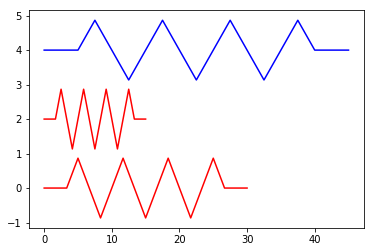

In [4]:
m1 = spring(30.)
plt.plot(m1.global_x,m1.global_y,'r-')
m1.locate_spring(0,2,0.*np.pi/180)
m1.deform(-15.)
plt.plot(m1.global_x,m1.global_y,'r-')
m1.locate_spring(0,4,0.*np.pi/180)
m1.deform(15.)
plt.plot(m1.global_x,m1.global_y,'b-')
plt.show()

In [5]:
%%capture
fig, ax = plt.subplots()
ax.axis([0,10,-2,4])
ax.set_xlabel('Length of the spring')
ax.set_title('Vibration of a spring')
ax.grid(True)
l1, = ax.plot([],[])
l2, = ax.plot([],[])
NF = 50
m2 = spring(8.0)
m2.locate_spring(0.,0.,0.)
m3 = spring(8.0)
m3.locate_spring(0.,2.,0.)

def animate(i):
    m2.deform(0.5*np.sin(2*np.pi*i/NF))
    m3.deform(0.5*np.sin(4*np.pi*i/NF))
    l1.set_data(m2.global_x,m2.global_y)
    l2.set_data(m3.global_x,m3.global_y)

ani = matplotlib.animation.FuncAnimation(fig, animate, frames = NF)

from IPython.display import HTML
HTML(ani.to_jshtml())